#Recurrent Neural Networks

In [2]:
tensorflow_version 2.x

SyntaxError: invalid syntax (<ipython-input-2-188dc89d1ebf>, line 1)

##Introduction to Recurrent Neural Networks
###Simple RNNs


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()
model.add(SimpleRNN(10, input_shape=(5, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                130       
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


###Embedding Layers

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

vocab_size = 30
embddng_dim = 10
seqnc_lngth = 5

model = Sequential()
model.add(Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 10)             300       
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


###Word Embedding + RNN on IMDB 

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

inpt_dim =  128
index_from = 3

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=index_from,
                                                      skip_top=20)
x_train = sequence.pad_sequences(x_train, maxlen=inpt_dim)
x_test = sequence.pad_sequences(x_test, maxlen=inpt_dim)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(' '.join(str(int(id)) for id in x_train[7]))

word_to_id = imdb.get_word_index()
word_to_id = {k:(v+index_from) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[7]))


Using TensorFlow backend.


  106496/17464789 [..............................] - ETA: 18:45

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Embedding, BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

seqnc_lngth =  128
embddng_dim = 64
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size, skip_top=20)
x_train = sequence.pad_sequences(x_train, maxlen=seqnc_lngth)
x_test = sequence.pad_sequences(x_test, maxlen=seqnc_lngth)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# now with batch norm
inpt_vec = Input(shape=(seqnc_lngth,))
l1 = Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth)(inpt_vec)
l2 = Dropout(0.3)(l1)
l3 = SimpleRNN(32)(l2)
l4 = BatchNormalization()(l3)
l5 = Dropout(0.2)(l4)
output = Dense(1, activation='sigmoid')(l5)

# model that takes input and encodes it into the latent space
rnn = Model(inpt_vec, output)

rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn.summary()


x_train shape: (25000, 128)
x_test shape: (25000, 128)
25000 train samples
25000 test samples
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 128, 64)           640000    
_________________________________________________________________
dropout (Dropout)            (None, 128, 64)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
__________________________

Epoch 1/1000
250/250 [==============================] - 26s 105ms/step - loss: 0.6669 - accuracy: 0.5924 - val_loss: 0.4842 - val_accuracy: 0.8114
Epoch 2/1000
250/250 [==============================] - 26s 105ms/step - loss: 0.3795 - accuracy: 0.8339 - val_loss: 0.3681 - val_accuracy: 0.8440
Epoch 3/1000
250/250 [==============================] - 26s 104ms/step - loss: 0.2738 - accuracy: 0.8900 - val_loss: 0.3906 - val_accuracy: 0.8360
Epoch 4/1000
250/250 [==============================] - 26s 104ms/step - loss: 0.1765 - accuracy: 0.9348 - val_loss: 0.5182 - val_accuracy: 0.8093
Epoch 5/1000
250/250 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9598
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
250/250 [==============================] - 26s 104ms/step - loss: 0.1148 - accuracy: 0.9598 - val_loss: 0.6213 - val_accuracy: 0.8302
Epoch 6/1000
250/250 [==============================] - 26s 105ms/step - loss: 0.0595 - accuracy: 0.

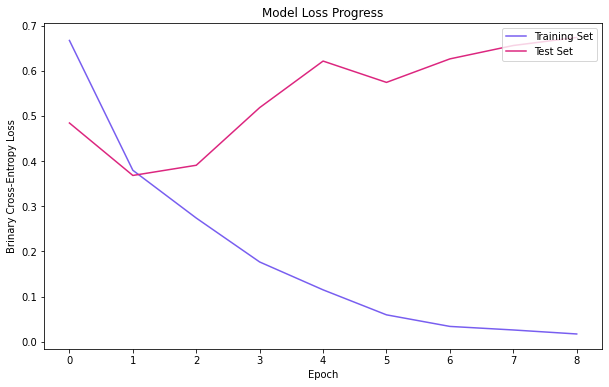

In [ ]:
# Fitting the RNN to the data

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=7, 
                         restore_best_weights=True, verbose=1)

hist = rnn.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

rnn.save_weights("rnn.hdf5")

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.13.rnn.imdb.loss.png', dpi=350, bbox_inches='tight')
plt.show()


In [ ]:
# Generate predictions
predictions = rnn.predict(x_train[0:8])
print(predictions)

for i in range(2):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(x_test[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in x_test[i] ))


[[0.9527108 ]
 [0.07647873]
 [0.07246595]
 [0.83202964]
 [0.15047908]
 [0.21699134]
 [0.6261049 ]
 [0.06179036]]
Sample = 0 | Length = 128
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <UNK> please give <UNK> one <UNK> miss <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> rest <UNK> <UNK> cast rendered terrible performances <UNK> show <UNK> flat flat flat <UNK> <UNK> <UNK> don't know how michael madison could have allowed <UNK> one on his plate he almost seemed <UNK> know <UNK> wasn't going <UNK> work out <UNK> his performance <UNK> quite <UNK> so all you madison fans give <UNK> <UNK> miss
Sample = 1 | Length = 128
young man regular altman player michael murphy has <UNK> small part <UNK> <U

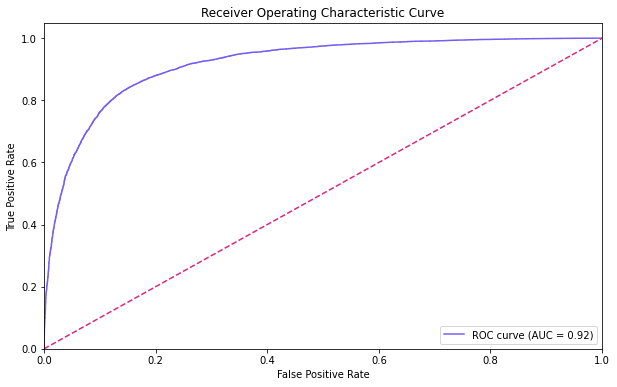

Threshold value is: 0.48431718
0.84456
[[10649  1851]
 [ 2035 10465]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_hat = rnn.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#785ef0', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#dc267f', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.savefig('ch.13.rnn.imdb.roc.png', dpi=350, bbox_inches='tight')
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
y_pred = np.where(y_hat>=optimal_threshold, 1, 0)
print(balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


##Long Short-Term Memory Models

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

seqnc_lngth =  128
embddng_dim = 64
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size, skip_top=20)
x_train = sequence.pad_sequences(x_train, maxlen=seqnc_lngth)
x_test = sequence.pad_sequences(x_test, maxlen=seqnc_lngth)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# now with batch norm
inpt_vec = Input(shape=(seqnc_lngth,))
l1 = Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth)(inpt_vec)
l2 = Dropout(0.3)(l1)
l3 = LSTM(32)(l2)
l4 = BatchNormalization()(l3)
l5 = Dropout(0.2)(l4)
output = Dense(1, activation='sigmoid')(l5)

# model that takes input and encodes it into the latent space
lstm = Model(inpt_vec, output)

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()


x_train shape: (25000, 128)
x_test shape: (25000, 128)
25000 train samples
25000 test samples
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 128, 64)           640000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
__________________________

Epoch 1/1000
250/250 [==============================] - 11s 45ms/step - loss: 0.4235 - accuracy: 0.7961 - val_loss: 0.4708 - val_accuracy: 0.8565
Epoch 2/1000
250/250 [==============================] - 11s 44ms/step - loss: 0.2457 - accuracy: 0.9010 - val_loss: 0.3812 - val_accuracy: 0.8216
Epoch 3/1000
250/250 [==============================] - 11s 44ms/step - loss: 0.1852 - accuracy: 0.9271 - val_loss: 0.4010 - val_accuracy: 0.8376
Epoch 4/1000
250/250 [==============================] - 11s 44ms/step - loss: 0.1371 - accuracy: 0.9480 - val_loss: 0.7082 - val_accuracy: 0.7757
Epoch 5/1000
249/250 [============================>.] - ETA: 0s - loss: 0.1004 - accuracy: 0.9626
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
250/250 [==============================] - 11s 44ms/step - loss: 0.1001 - accuracy: 0.9627 - val_loss: 0.7713 - val_accuracy: 0.8156
Epoch 6/1000
250/250 [==============================] - 11s 44ms/step - loss: 0.0544 - accuracy: 0.9817 -

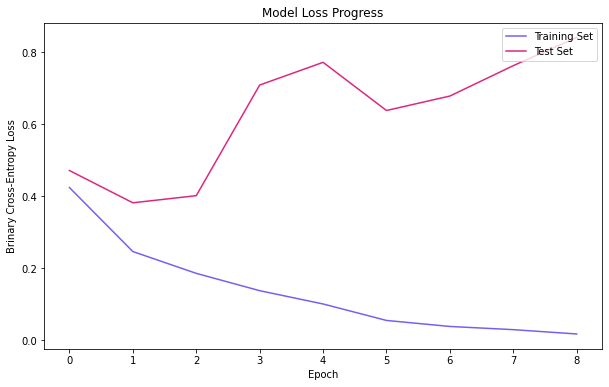

In [ ]:
# Fitting the LSTM to the data

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=7, 
                         restore_best_weights=True, verbose=1)

hist = lstm.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

lstm.save_weights("lstm.hdf5")

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.13.lstm.imdb.loss.png', dpi=350, bbox_inches='tight')
plt.show()


In [ ]:
# Generate predictions
predictions = lstm.predict(x_train[0:8])
print(predictions)

for i in range(2):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(x_test[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in x_test[i] ))


[[0.9633446 ]
 [0.05752077]
 [0.02576573]
 [0.7919468 ]
 [0.04072253]
 [0.27891672]
 [0.87319726]
 [0.02674793]]
Sample = 0 | Length = 128
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <UNK> please give <UNK> one <UNK> miss <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> rest <UNK> <UNK> cast rendered terrible performances <UNK> show <UNK> flat flat flat <UNK> <UNK> <UNK> don't know how michael madison could have allowed <UNK> one on his plate he almost seemed <UNK> know <UNK> wasn't going <UNK> work out <UNK> his performance <UNK> quite <UNK> so all you madison fans give <UNK> <UNK> miss
Sample = 1 | Length = 128
young man regular altman player michael murphy has <UNK> small part <UNK> <U

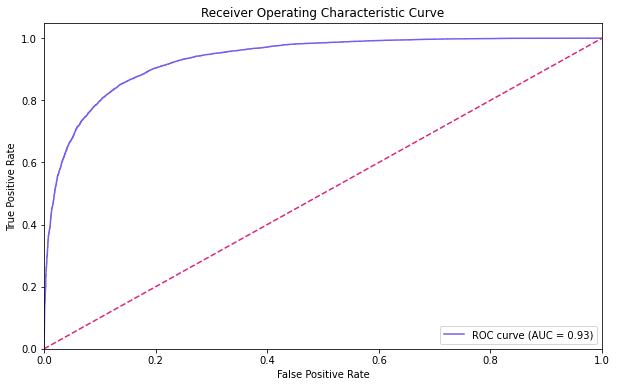

Threshold value is: 0.29508892
0.85712
[[10797  1703]
 [ 1869 10631]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

y_hat = lstm.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#785ef0', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#dc267f', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.savefig('ch.13.lstm.imdb.roc.png', dpi=350, bbox_inches='tight')
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
y_pred = np.where(y_hat>=optimal_threshold, 1, 0)
print(balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


##Sequence to Vector Models
###Unsupervised Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import RepeatVector, TimeDistributed
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

seqnc_lngth =  28
ltnt_dim = 2 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

inpt_vec = Input(shape=(seqnc_lngth, seqnc_lngth,))
l1 = Dropout(0.1)(inpt_vec)
l2 = LSTM(seqnc_lngth, activation='tanh', 
          recurrent_activation='sigmoid')(l1)
l3 = BatchNormalization()(l2)
l4 = Dropout(0.1)(l3)
l5 = Dense(ltnt_dim, activation='sigmoid')(l4)

# model that takes input and encodes it into the latent space
encoder = Model(inpt_vec, l5)

l6 = RepeatVector(seqnc_lngth)(l5)
l7 = LSTM(seqnc_lngth, activation='tanh', recurrent_activation='sigmoid', 
          return_sequences=True)(l6)
l8 = BatchNormalization()(l7)
l9 = TimeDistributed(Dense(seqnc_lngth, activation='sigmoid'))(l8)

autoencoder = Model(inpt_vec, l9)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=15, 
                         restore_best_weights=True, verbose=1)

hist = autoencoder.fit(x_train, x_train, batch_size=100, epochs=1000, 
                       callbacks=[stop_alg, reduce_lr], shuffle=True, 
                       validation_data=(x_test, x_test))


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 28)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 28)                6384      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28)                112       
_________________________________________________________________
dropout_11 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 58        
__________________________________________________________

###Results

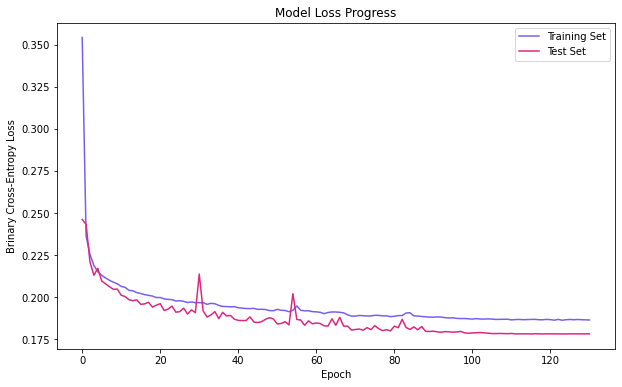

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.13.ae.lstm.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()

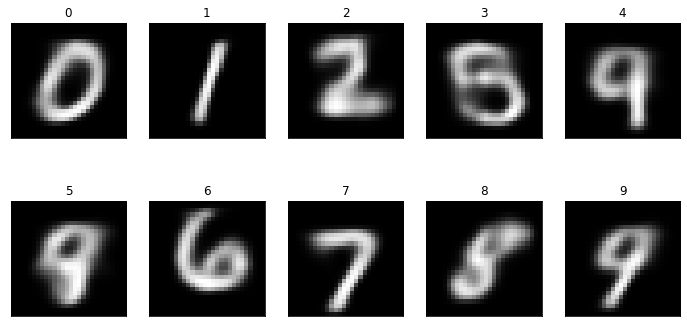

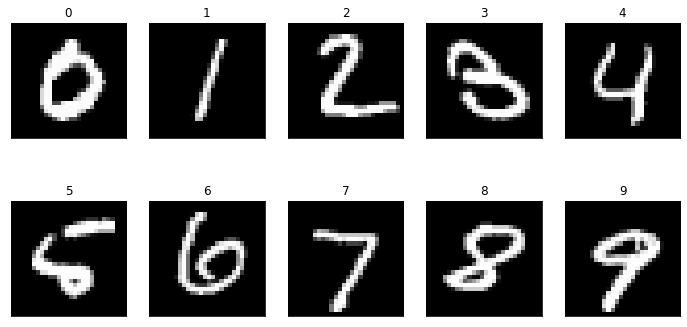

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encdd = encoder.predict(x_test)
x_hat = autoencoder.predict(x_test)

smp_idx = [3,2,1,18,4,8,11,0,61,9]
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[smp_idx].reshape(10, 28, 28), y_test[smp_idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.13.ae.lstm.mnist.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[smp_idx].reshape(10, 28, 28), y_test[smp_idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.13.ae.lstm.mnist.original.png', bbox_inches='tight', dpi=350)
plt.show()

(10000, 2)


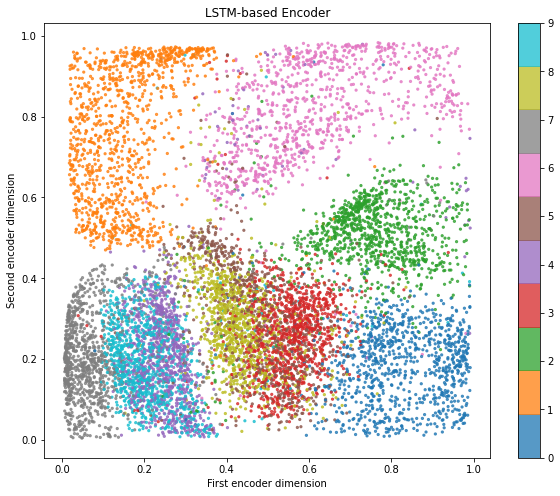

In [ ]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('LSTM-based Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()
plt.savefig('ch.13.ae.lstm.png', bbox_inches='tight', dpi=350)

##Vector to Sequence Models
###Bidirectional LSTM
###Implementation and Results

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Bidirectional, LSTM
from tensorflow.keras.layers import RepeatVector, TimeDistributed
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

seqnc_lngth =  28
ltnt_dim = 100 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

inpt_vec = Input(shape=(seqnc_lngth, seqnc_lngth,))
l1 = Dropout(0.5)(inpt_vec)
l2 = Bidirectional(LSTM(seqnc_lngth, activation='tanh', 
                        recurrent_activation='sigmoid'))(l1)
l3 = BatchNormalization()(l2)
l4 = Dropout(0.5)(l3)
l5 = Dense(ltnt_dim, activation='sigmoid')(l4)

# model that takes input and encodes it into the latent space
encoder = Model(inpt_vec, l5, name='encoder')
encoder.summary()

ltnt_vec = Input(shape=(ltnt_dim,))
l6 = Dropout(0.1)(ltnt_vec)
l7 = RepeatVector(seqnc_lngth)(l6)
l8 = Bidirectional(LSTM(seqnc_lngth, activation='tanh', recurrent_activation='sigmoid', 
          return_sequences=True))(l7)
l9 = BatchNormalization()(l8)
l10 = TimeDistributed(Dense(seqnc_lngth, activation='sigmoid'))(l9)

decoder = Model(ltnt_vec, l10, name='decoder')
decoder.summary()

recon = decoder(encoder(inpt_vec))
autoencoder = Model(inpt_vec, recon, name='ae')

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=15, 
                         restore_best_weights=True, verbose=1)

hist = autoencoder.fit(x_train, x_train, batch_size=100, epochs=1000, 
                       callbacks=[stop_alg, reduce_lr], shuffle=True, 
                       validation_data=(x_test, x_test))


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 56)                12768     
_________________________________________________________________
batch_normalization_14 (Batc (None, 56)                224       
_________________________________________________________________
dropout_16 (Dropout)         (None, 56)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               5700      
Total params: 18,692
Trainable params: 18,580
Non-trainable para

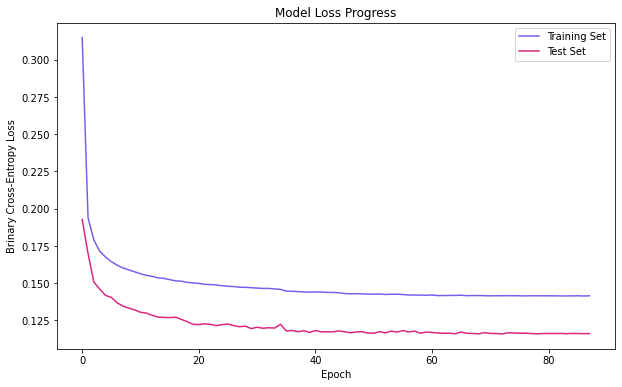

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.13.ae.bilstm.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()

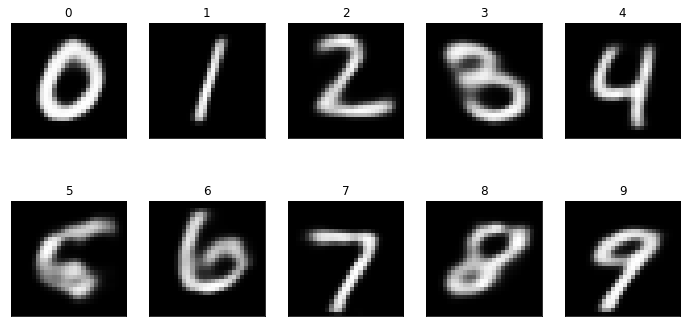

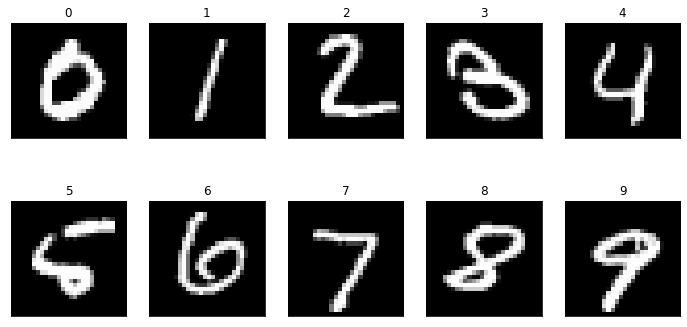

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encdd = encoder.predict(x_test)
x_hat = autoencoder.predict(x_test)

smp_idx = [3,2,1,18,4,8,11,0,61,9]
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[smp_idx].reshape(10, 28, 28), y_test[smp_idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.13.ae.bilstm.mnist.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[smp_idx].reshape(10, 28, 28), y_test[smp_idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.13.ae.bilstm.mnist.original.png', bbox_inches='tight', dpi=350)
plt.show()

(10000, 100)
(10000, 2)


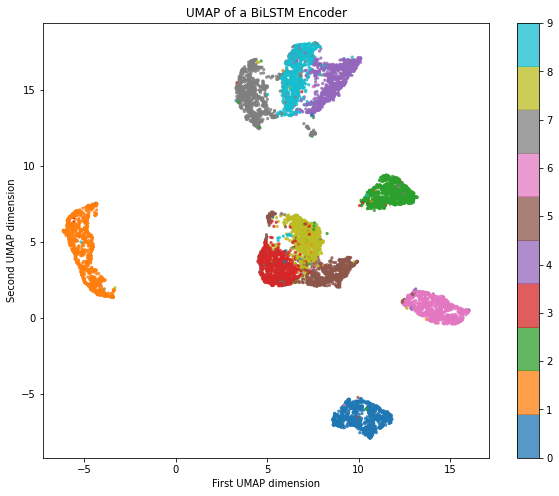

In [ ]:
import matplotlib.pyplot as plt
import umap

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

X_ = umap.UMAP().fit_transform(encdd)
print(X_.shape)


plt.figure(figsize=(10,8))
plt.title('UMAP of a BiLSTM Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First UMAP dimension')
plt.ylabel('Second UMAP dimension')
plt.colorbar()
plt.savefig('ch.13.ae.bilstm.umap.png', bbox_inches='tight', dpi=350)

(1, 28, 28)


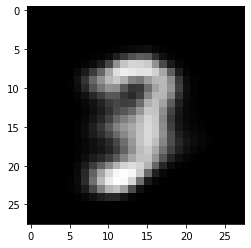

In [ ]:
z = np.random.rand(1,100)
x_ = decoder.predict(z)
print(x_.shape)
plt.imshow(x_[0], cmap='gray')

##Sequence to Sequence Models

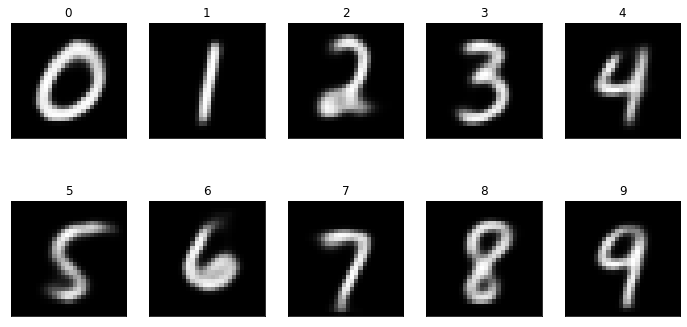

In [ ]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  rnd_vec = np.round(np.mean(x_test[y_test==i],axis=0))
  rnd_vec = np.reshape(rnd_vec, (1,28,28))
  z = encoder.predict(rnd_vec)
  decdd = decoder.predict(z)
  plt.imshow(decdd[0], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(i)
plt.savefig('ch.13.ae.bilstm.mnist.v2s.png', bbox_inches='tight', dpi=350)
plt.show()